In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

        
pd.set_option('display.max_columns', 500)

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


from xgboost import XGBClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

import pickle
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
raw_data=pd.read_csv('/kaggle/input/sloan-digital-sky-survey-dr18/SDSS_DR18.csv')
raw_data.shape

(100000, 43)

In [3]:
raw_data.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


In [4]:
raw_data.describe()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift
count,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.240000e+18,1.859200e+18,168.856657,17.832739,18.641137,17.407088,16.878550,16.517137,16.154837,1477.564770,301.0,3.484040,240.969710,1651.29028,53055.987540,337.122140,6.497004,4.678636,4.458623,4.478506,4.560777,52.988780,175.000342,397.383205,302.745181,471.129084,-3.683850,1.111468,-1.741663,1.123442,-8.957856,19.592174,17.884605,18.392280,17.531364,17.138493,0.588445,0.673314,0.660934,0.549130,0.311389,0.168441
std,0.000000e+00,2.265257e+18,83.844216,26.344079,0.829035,0.974683,1.118858,31.694636,54.871034,459.696408,0.0,1.593879,173.842641,2012.38710,1564.434381,207.392012,13.134345,5.080707,5.189891,4.922520,5.692894,136.851904,357.402958,879.192500,645.886531,1123.432784,242.870050,100.026659,192.347301,94.895979,328.489488,1.320291,1.288541,1.282606,31.701194,54.876352,0.260097,0.235317,0.242927,31.622620,54.770201,0.434285
min,1.240000e+18,2.990000e+17,0.003092,-11.252825,11.726470,11.696170,11.277090,-9999.000000,-9999.000000,94.000000,301.0,1.000000,11.000000,266.00000,51578.000000,1.000000,0.031018,0.072805,0.057369,0.503416,0.045731,-9306.297000,-396.729600,-489.092700,-19.912980,-75768.980000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,-9999.000000,13.253570,11.253550,11.658570,-9999.000000,-9999.000000,0.050000,0.050000,0.050000,-9999.000000,-9999.000000,-0.004268
25%,1.240000e+18,5.280000e+17,128.879582,-0.537780,18.214315,16.853340,16.194763,15.861995,15.620268,1239.000000,301.0,2.000000,102.000000,469.00000,51988.000000,164.000000,1.580248,1.483575,1.301338,1.350223,1.335289,19.424303,58.397385,113.048875,90.606687,121.916650,0.782614,0.743202,0.663752,0.687324,0.674866,18.751895,17.098733,17.600867,16.842290,16.645390,0.387406,0.514009,0.487474,0.470529,0.409965,0.000065
50%,1.240000e+18,6.980000e+17,168.079889,2.899490,18.878005,17.520310,16.896065,16.594740,16.419040,1458.000000,301.0,3.000000,199.000000,620.00000,52254.000000,327.000000,3.473864,3.336594,3.349003,3.291405,3.541550,27.950255,93.950580,214.238300,164.623100,243.603200,1.468786,1.546289,1.497291,1.537168,1.469153,19.560930,18.023495,18.585375,17.742665,17.526325,0.611638,0.704848,0.692239,0.679104,0.641443,0.048772
75%,1.240000e+18,2.750000e+18,214.554569,46.911371,19.275750,18.052460,17.565593,17.310102,17.193873,1854.000000,301.0,5.000000,337.000000,2445.00000,54400.000000,496.000000,7.470103,6.570969,6.196268,6.325418,6.098101,50.844825,173.442500,415.916475,310.852750,498.303575,3.088440,2.978893,2.769644,2.855537,2.598539,20.660875,18.858960,19.327640,18.586033,18.366243,0.796679,0.864902,0.863116,0.849946,0.822491,0.096680
max,1.240000e+18,1.410000e+19,359.996095,68.731483,19.599990,19.977270,31.698160,30.980870,28.668700,2327.000000,301.0,6.000000,812.000000,12547.00000,58932.000000,1000.000000,258.518600,258.409800,258.453600,258.436700,258.422600,17173.480000,21686.390000,40899.660000,31533.950000,54495.910000,177.371300,75.968280,139.884000,123.567700,74.485400,26.369840,24.802850,25.962180,24.362590,27.043280,1.000000,1.000000,1.000000,1.000000,1.000000,6.990327


In [5]:
raw_data.isna().sum()

objid          0
specobjid      0
ra             0
dec            0
u              0
g              0
r              0
i              0
z              0
run            0
rerun          0
camcol         0
field          0
plate          0
mjd            0
fiberid        0
petroRad_u     0
petroRad_g     0
petroRad_i     0
petroRad_r     0
petroRad_z     0
petroFlux_u    0
petroFlux_g    0
petroFlux_i    0
petroFlux_r    0
petroFlux_z    0
petroR50_u     0
petroR50_g     0
petroR50_i     0
petroR50_r     0
petroR50_z     0
psfMag_u       0
psfMag_r       0
psfMag_g       0
psfMag_i       0
psfMag_z       0
expAB_u        0
expAB_g        0
expAB_r        0
expAB_i        0
expAB_z        0
redshift       0
class          0
dtype: int64

In [6]:
raw_data['class'].value_counts()

class
GALAXY    52343
STAR      37232
QSO       10425
Name: count, dtype: int64

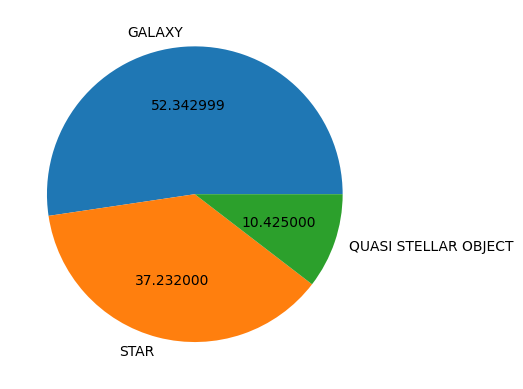

In [7]:
plt.pie(raw_data['class'].value_counts(),labels=['GALAXY','STAR','QUASI STELLAR OBJECT'],autopct='%f')
plt.show()

In [8]:
le=LabelEncoder()
raw_data['class']=le.fit_transform(raw_data['class'])
raw_data.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,plate,mjd,fiberid,petroRad_u,petroRad_g,petroRad_i,petroRad_r,petroRad_z,petroFlux_u,petroFlux_g,petroFlux_i,petroFlux_r,petroFlux_z,petroR50_u,petroR50_g,petroR50_i,petroR50_r,petroR50_z,psfMag_u,psfMag_r,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,301,5,462,288,52000,456,7.282402,7.004576,6.855976,7.112749,6.930960,30.66393,95.11749,181.718400,146.991600,207.027300,3.832911,3.659077,3.486617,3.621753,3.606744,21.11891,19.50324,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,0
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,301,5,467,289,51990,322,1.335305,1.321027,1.167182,1.266144,0.966431,14.55308,10.33474,4.623398,7.371214,4.824737,0.653159,0.659008,0.536881,0.650679,0.538456,19.58945,20.34491,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,2
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,301,5,467,288,52000,614,3.874802,3.952013,4.007457,4.057646,3.818449,19.31011,72.75911,220.896700,148.093400,278.021100,1.898399,1.993737,1.944997,1.968584,1.863368,20.82290,18.54832,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,0
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,301,5,467,2558,54140,414,1.251496,1.325716,1.176959,1.281164,1.199375,15.33828,62.74539,125.370700,104.867200,134.623300,0.633329,0.679328,0.611904,0.657945,0.622971,19.49706,17.42272,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,2
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,301,5,467,2558,54140,403,1.365736,1.336521,1.161740,1.266766,1.239413,45.91689,178.20720,359.093500,300.775600,388.320300,0.677250,0.680561,0.613476,0.655520,0.640669,18.33505,16.28580,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,2


In [9]:
raw_data['class']=raw_data['class'].astype('int')

In [10]:
train,test=train_test_split(raw_data,test_size=0.1,stratify=raw_data['class'])
print(train.shape)
print(test.shape)

(90000, 43)
(10000, 43)


In [11]:
X=train.drop('class',axis=1).to_numpy()
y=train['class'].to_numpy()

X_test=test.drop('class',axis=1).to_numpy()
y_test=test['class'].to_numpy()

In [12]:
# model=XGBClassifier(n_estimators=500,max_depth=7,n_jobs=-1)
# model

In [13]:
# model.fit(X,y,eval_set=[[X_test,y_test]],verbose=1)

In [14]:
# (model.predict(X_test)==y_test).sum()/y_test.shape[0]

In [15]:
search_params={
    'n_estimators':[250,500,1000],
    'max_depth':[3,5,7],
    'colsample_bytree':[0.3,0.6,1],
    'subsample':[0.3,0.6,1],
}

search=GridSearchCV(
    estimator=XGBClassifier(n_jobs=-1),
    param_grid=search_params,
    scoring='accuracy',
    cv=3,
)

search.fit(X,y)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=-1, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.6, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [250, 500, 1000],
                         'subsample': [0.3, 0.6, 1]},
             scoring='accuracy')

In [16]:
search.best_params_

{'colsample_bytree': 0.3, 'max_depth': 7, 'n_estimators': 500, 'subsample': 1}

In [17]:
X_final=raw_data.drop('class',axis=1)
y_final=raw_data['class']

In [18]:
model=XGBClassifier(**search.best_params_)
model.fit(X_final,y_final)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.3, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [19]:
model.save_model('model.xgb')

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:11:35] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
  warnings.warn(smsg, UserWarning)


In [20]:
predictions=model.predict(X_test)
predictions=le.inverse_transform(predictions)
original=le.inverse_transform(y_test)

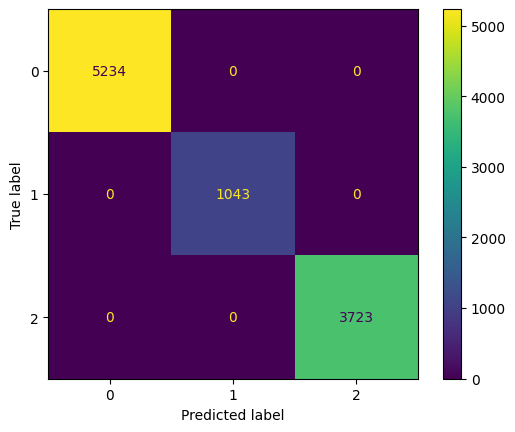

In [21]:
cm=confusion_matrix(original,predictions)
cmd=ConfusionMatrixDisplay(cm)
cmd.plot()